In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from skimage import io

import numpy as np
import scipy.linalg as la

**1**. (10 points)

Given the following covariance matrix
```python
A = np.array([[2,1],[1,4]])
```

1. Show that the eigenvectors of $A$ are orthogonal. 
2. What is the vector representing the first principal component direction? 
3. Find $A^{-1}$ without performing a matrix inversion. 
4. What are the coordinates of the data points (0, 1) and (1, 1) in the standard basis expressed as coordinates of the principal components? 
5. What is the proportion of variance explained if we keep only the projection onto the first principal component? 

In [2]:
# Matrix
A = np.array([[2,1],[1,4]])

In [3]:
# Compute eigenvalues/vectors
vals, vecs = np.linalg.eig(A)
vecs

array([[-0.92387953, -0.38268343],
       [ 0.38268343, -0.92387953]])

In [4]:
# Dot product of eigenvectors equals 0, so they're orthogonal
vecs[:, 0] @ vecs[:, 1]

0.0

In [5]:
# First principal component eigenvector
vecs[:, vals.argmax()]

array([-0.38268343, -0.92387953])

- Note: $A^{-1} = V diag(1/ \lambda) V^T$

In [6]:
# Compute inverse
vals = np.real_if_close(vals)
inv = vecs.dot(np.diag(1/vals).dot(vecs.T))
inv

array([[ 0.57142857, -0.14285714],
       [-0.14285714,  0.28571429]])

In [7]:
# Verify inverse
A @ inv

array([[1.00000000e+00, 5.55111512e-17],
       [0.00000000e+00, 1.00000000e+00]])

In [8]:
# First vector
vecs.T @ np.array([0,1]).reshape(-1,1)

array([[ 0.38268343],
       [-0.92387953]])

In [9]:
# Second vector
vecs.T @ np.array([1,1]).reshape(-1,1)

array([[-0.5411961 ],
       [-1.30656296]])

In [10]:
# Variance explained by first principal component
vals[vals.argmax()] / np.sum(vals)

0.7357022603955158

**2**. (10 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (2 points)

2. Compute the rank of $A$ (use any method you like). (2 points)

3. Find the eigenvalues and eigenvectors of $A$. (2 points)

4. What is the matrix representation of $f$ with respect to the eigenvectors? (4 points)

In [11]:
# In numpy
A = np.array([10, 2, 1, -10, -5, -4, 16, 20, 13]).reshape(3,3)
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [12]:
# det(A) > 0 ==> full rank
la.det(A)

162.0

In [13]:
# Rank = # non-singular eigenvalues
np.real_if_close(la.eigvals(A))

array([9., 3., 6.])

In [14]:
# Eigenvalues and Eigenvectors
la.eig(A)

(array([9.+0.j, 3.+0.j, 6.+0.j]),
 array([[ 5.77350269e-01,  6.40319766e-17, -1.20385853e-01],
        [-5.77350269e-01, -4.47213595e-01, -2.40771706e-01],
        [ 5.77350269e-01,  8.94427191e-01,  9.63086825e-01]]))

In [15]:
# Representation of f with respect to the eigenbasis
vals, vecs = la.eig(A)
np.diag(np.real_if_close(vals))

array([[9., 0., 0.],
       [0., 3., 0.],
       [0., 0., 6.]])

**3**. (10 points)


- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](figs/vecs.png)

In [16]:
# Rotation array
t = 30 * np.pi / 180
rotate = np.array([[np.cos(t), -np.sin(t)],
                 [np.sin(t), np.cos(t)]])
rotate

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [17]:
# Scale array
stretch = np.diag([3, 0.5])
stretch

array([[3. , 0. ],
       [0. , 0.5]])

In [18]:
# Total transformation
transform = rotate @ stretch
transform

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [19]:
# To find the inverse, transpose the rotation and invert the diagonals of the stretch
inv = np.diag(1/np.diag(stretch)) @ rotate.T
inv @ transform

array([[1.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 1.00000000e+00]])

**4**. (30 points)


We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` 
2. solving the normal equations $X^TX \beta = X^Ty$ 
3. using `scipy.linalg.svd` 

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [20]:
# Data
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
              8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,90.55155435, 
              100.56372833,  91.83189927,  90.41536733,90.43103028,  23.0719842 ])

In [21]:
# Generate data matrix
sx = np.sin(x)
x2 = x**2
x3 = x**3
X = np.c_[sx, x2, x3]

In [22]:
# Method 1
beta = la.lstsq(X, y)[0]
beta

array([10.20024689,  2.99259014, -0.19883227])

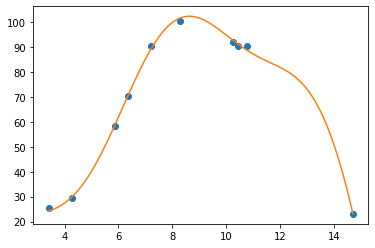

In [23]:
# Method 1 plot
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o')
plt.plot(xp, beta[0]*np.sin(xp) + beta[1]*xp**2 + beta[2]*xp**3, '-');

In [24]:
# Method 2
beta = la.inv(X.T @ X) @ (X.T @ y)
beta

array([10.20024689,  2.99259014, -0.19883227])

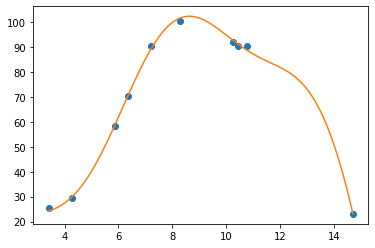

In [25]:
# Method 2 plot
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o')
plt.plot(xp, beta[0]*np.sin(xp) + beta[1]*xp**2 + beta[2]*xp**3, '-');

Note:
- SVD makes it trivial to compute the pseudoinverse $X^+$ of $X$
- Single Value Decomposition: $X = \Gamma \Lambda \Delta^T$
- Pseudoinverse of $X$: $X^+ = \Gamma \Lambda^{-1} \Delta$
- Betas: $\beta = X^+ y$

In [26]:
# SVD
U, S, V = la.svd(X, )

In [27]:
# Pseudoinverse of Lambda
G = np.zeros((V.shape[0], U.shape[0]))
for i, s in enumerate(S):
    G[i,i] = 1/s

In [28]:
# Compute betas
beta = V.T @ G @ U.T @ y
beta

array([10.20024689,  2.99259014, -0.19883227])

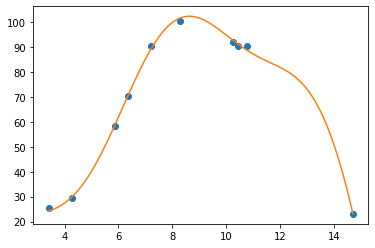

In [29]:
# Method 3 plot
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o')
plt.plot(xp, beta[0]*np.sin(xp) + beta[1]*xp**2 + beta[2]*xp**3, '-');

**5**. (40 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

In [30]:
# Import picture in grayscale
img = io.imread("figs/elephant.jpg", as_gray=True)

In [31]:
# Make sure image has correct dimensions
img.shape

(1066, 1600)

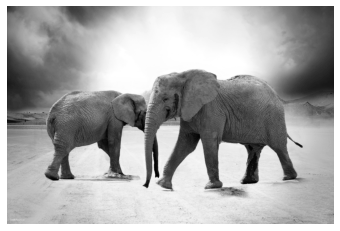

In [32]:
# Original image
plt.imshow(img, cmap="gray")
plt.gcf().set_frameon(False)
plt.gca().set_axis_off();

In [33]:
# SVD
U, S, V = la.svd(img)

In [34]:
# Find number of eigenvalues that preserve over 99.5% of variation
k = np.sum(np.cumsum((S**2)/(S**2).sum()) <= 0.995)

In [35]:
# Keep only first k eigenvectors
new_img = U[:,:k] @ np.diag(S[:k])@ V[:k, :]

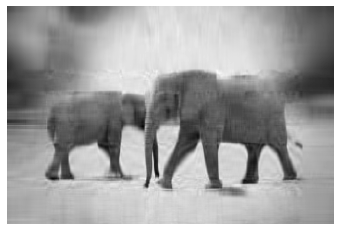

In [36]:
# New image
plt.imshow(new_img, cmap="gray")
plt.gcf().set_frameon(False)
plt.gca().set_axis_off();

In [37]:
# Size ratio
old_size = img.shape[0] * img.shape[1]
new_size = U.shape[0]*k + k + k*V.shape[1]
new_size / old_size

0.0312734521575985